In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("/Users/weizeng/Documents/UBER Takehome")

In [35]:
os.listdir(".")

['.DS_Store',
 '.ipynb_checkpoints',
 'ds_challenge_v2_1_data (1) (2).csv',
 'DSInterviewChallengeV_2_4 (3).pdf',
 'UBER Takehome.ipynb',
 'Untitled.ipynb']

In [43]:
df = pd.read_csv("./ds_challenge_v2_1_data (1) (2).csv")

In [44]:
print df.describe()
print df.shape
print df.columns
df.head(10)

                 id  vehicle_year
count  54681.000000  13223.000000
mean   27341.000000   2010.568025
std    15785.189372     35.219184
min        1.000000      0.000000
25%    13671.000000   2008.000000
50%    27341.000000   2013.000000
75%    41011.000000   2015.000000
max    54681.000000   2017.000000
(54681, 11)
Index([u'id', u'city_name', u'signup_os', u'signup_channel', u'signup_date',
       u'bgc_date', u'vehicle_added_date', u'vehicle_make', u'vehicle_model',
       u'vehicle_year', u'first_completed_date'],
      dtype='object')


,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
5,6,Strark,android web,Referral,1/18/16,1/18/16,1/22/16,Cadillac,DTS,2006.0,NaN
6,7,Strark,ios web,Paid,1/14/16,1/16/16,1/21/16,Toyota,Prius V,2014.0,1/23/16
7,8,Strark,ios web,Referral,1/26/16,2/5/16,NaN,NaN,NaN,NaN,NaN
8,9,Strark,NaN,Referral,1/5/16,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Berton,ios web,Paid,1/25/16,NaN,NaN,NaN,NaN,NaN,NaN


* this part will process the time series related variables
* Create the day of week for sign up date 
* Create the date differences between the signup and consent to background check

In [45]:
 def dateconvert (var):
    """
    This function convert the text date to pandas date time
    """
    df[var] = pd.to_datetime(df[var], format ='%m/%d/%y')
    return  df[var]

# loop through all date related variables 
ls = ['signup_date' , 'bgc_date' , 'vehicle_added_date']

for i in ls:
    dateconvert(i)

# derive day differences between sign up, consent to background check and vehicle added   
days = lambda x: np.NaN if pd.isnull(x) else pd.to_timedelta(x).days

df['signup_to_bgc'] = (df['bgc_date'] - df['signup_date']).apply(days)
df['signup_to_add'] = (df['vehicle_added_date'] - df['signup_date']).apply(days)

#signup weekday 
df['signup_wkday'] = df ['signup_date'].apply(lambda x: x.weekday())


* At least 10 days difference between signup and first trip date
* It seems a driver can give consent to background check the same date they sign up and add a vehicle too 

In [61]:
print "sign up to consent to background check:", df['signup_to_bgc'].min(), df['signup_to_bgc'].max()
print "signup_date:", df['signup_date'].min(), df['signup_date'].max()
print "bgc_date:", df[df['bgc_date'].notnull()]['bgc_date'].min(), df['bgc_date'].max()
print "vehicle_added_date:", df[df['vehicle_added_date'].notnull()]['vehicle_added_date'].min(), df['vehicle_added_date'].max()
print "first_trip_date:", df[df['first_completed_date'].notnull()]['first_completed_date'].min(), df['first_completed_date'].max()

sign up to consent to background check: 0.0 69.0
signup_date: 2016-01-01 00:00:00 2016-01-30 00:00:00
bgc_date: 2016-01-01 00:00:00 2016-03-25 00:00:00
vehicle_added_date: 2016-01-01 00:00:00 2016-03-26 00:00:00
first_trip_date: 1/10/16 2/9/16


In [47]:
# additional check to make sure all first trip date is later than sign up date
sum(df['signup_to_bgc']<0)
sum(df['signup_to_add']<0)
df[df['signup_to_add']<0]
# one record with sign up later than vehicle add; delete this case 
df = df[~(df['signup_to_add']<0)]
df.shape

(54680, 14)

* the following part will calcuate the proportion of drive out of all signups

In [48]:
#take a look at the DV - first drive or not 

#all cases have sign up date
print 'Number of cases without sign up date is {0}'.format (sum(df['signup_date'].isnull()))

#create FirstTripDone 
df['FirstTripDone'] = df['first_completed_date'].apply(lambda x: 0 if pd.isnull(x) else 1)
df['vehicleadd'] = df['vehicle_added_date'].apply(lambda x: 0 if pd.isnull(x) else 1)
df['bgcdone'] = df['bgc_date'].apply(lambda x: 0 if pd.isnull(x) else 1)

prop_drive = np.mean(df['FirstTripDone'])
prop_va = np.mean(df['vehicleadd'])
prop_bg = np.mean(df['bgcdone'])

print 'driving rate is {0:.1f}%'.format(prop_drive*100)
print 'Vehicle Added Rate is {0:.1f}%'.format(prop_va*100)
print 'Background Check Consent Rate is {0:.1f}%'.format(prop_bg*100)


Number of cases without sign up date is 0
driving rate is 11.2%
Vehicle Added Rate is 24.0%
Background Check Consent Rate is 60.2%


### check missings in the dataframe 
* signup_os has 6857 missings; will use hotdeck padding to fill na
* since vehicle information only available after a vehicle is added, so 76% sign up missing that information


In [52]:
#check IVs missings 
print df.isnull().sum()
df['signup_os_fill'] = df['signup_os'].fillna(method = 'pad')
df[df['signup_os'].isnull()].signup_os_fill.value_counts()

id                          0
city_name                   0
signup_os                6857
signup_channel              0
signup_date                 0
bgc_date                21785
vehicle_added_date      41547
vehicle_make            41458
vehicle_model           41458
vehicle_year            41458
first_completed_date    48544
signup_to_bgc           21785
signup_to_add           41547
signup_wkday                0
FirstTripDone               0
vehicleadd                  0
bgcdone                     0
signup_os_fill              0
dtype: int64


ios web        2349
android web    2094
windows        1013
mac             831
other           570
Name: signup_os_fill, dtype: int64

* Assuming we are running a model on the 7th day after a driver sign up to predict whether the driver will eventually drive, we can take a look at whether and when they give a concern
* It seems that people giving consent to bg check are more likely to eventually drive. The longer they wait to give the consent the less likely they take the first trip 

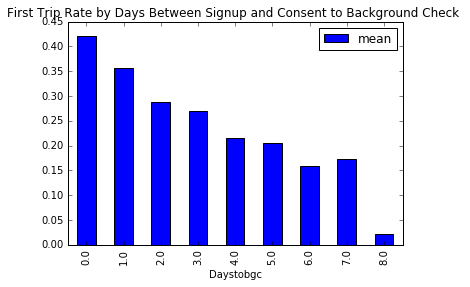

In [55]:
df['signup_to_bgc'].describe()
df['Daystobgc'] = df['signup_to_bgc'].apply(lambda x: x if x <= 7 else 8)
df['Daystobgc'].value_counts()
m = df.groupby('Daystobgc')['FirstTripDone'].agg({'mean': np.mean})
m.plot(kind='bar')
plt.title ('First Trip Rate by Days Between Signup and Consent to Background Check ')

In [79]:
df.columns

Index([u'id', u'city_name', u'signup_os', u'signup_channel', u'signup_date',
       u'bgc_date', u'vehicle_added_date', u'vehicle_make', u'vehicle_model',
       u'vehicle_year', u'first_completed_date', u'signup_to_bgc',
       u'signup_to_add', u'signup_wkday', u'FirstTripDone', u'vehicleadd',
       u'bgcdone', u'signup_os_fill', u'consentbin', u'Daystobgc'],
      dtype='object')

In [123]:
ls = ['city_name','signup_channel','Daystobgc','signup_os_fill','signup_wkday','vehicle_year']
def meanbyfeature (var):
    return df.groupby(var)['FirstTripDone'].agg({'mean': np.mean})

for i in range(len(ls)):
    ls[i] = meanbyfeature(ls[i])

### check mean first trip done by available features 

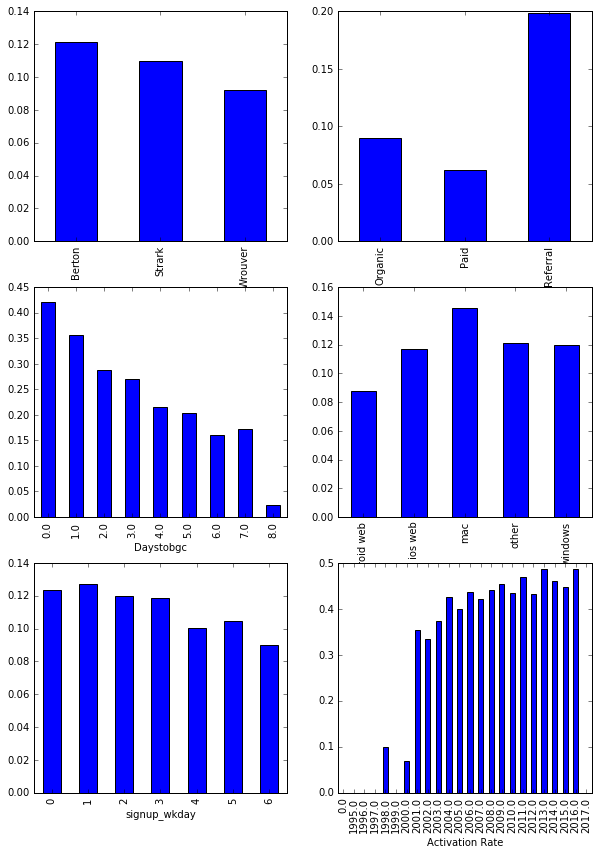

In [118]:
f, ax = plt.subplots(3, 2)
q = 0 
for i in range(3):
    for j in range(2):
        ls[q].plot(kind='bar', ax=ax[i, j], figsize = (10,14), legend=False) 
        plt.ylabel ('Activation Rate')
        plt.title ('First Trip Rate by Selected Features ')

        q += 1
#ls[0].plot(kind='bar', subplots = True, ax=ax[0,0], figsize =  )
#ls[1].plot(kind='bar', subplots = True, ax=ax[0,1])
#Daystobgc.plot(kind='bar', subplots = True, ax=ax[1,0])
#signup_os_fill.plot(kind='bar', subplots = True, ax=ax[1,1])


In [168]:
#export df to csv for tree model data visulation in R
df.to_csv("./cleaned_df.csv")

# Model 1 : 
#### This model assumes that we need to make a prediction when a driver signs up. At that moment, we have limited information regarding the signup, which includes city, signup channel, signup os, signup weekeday. We can also conisder the interaction of city and channel and os and channel. 

* X :  ['city_name','signup_channel', 'signup_os_fill','signup_wkday' , city_channel' , 'os_channel']
* y : First Trip is finished 
* Model:  Random Forest Model with class_weight = 'balanced' is used here 
#### Steps:
* select features
* transform the matrix
* split the data into training and test dataset: 70% for training and 30% for testing

In [308]:
#training and test split 
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics


In [334]:
y = df['FirstTripDone']
X = df[['city_name','signup_channel', 'signup_os_fill','signup_wkday']]

X['city_channel'] = [ X['city_name'].iloc[i] + X['signup_channel'].iloc[i] for i in range(len(X))]
X['os_channel'] = [ X['signup_os_fill'].iloc[i] + X['signup_channel'].iloc[i] for i in range(len(X))]


LEconvert = preprocessing.LabelEncoder()
for i in ['city_name','signup_channel', 'signup_os_fill','signup_wkday', 'city_channel' , 'os_channel']:
    X[i] = LEconvert.fit_transform(X[i])



/Users/weizeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/weizeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/weizeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [335]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, random_state =5, test_size =0.3 )
print np.mean(y_train)
print np.mean(y_test)

0.112028425123
0.11265544989


In [311]:
clf

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

* train random forests 
* due to inbalanced data, class_weight = 'balanced' is used

Auc based on the probablity0.70
Auc based on the prediction0.65


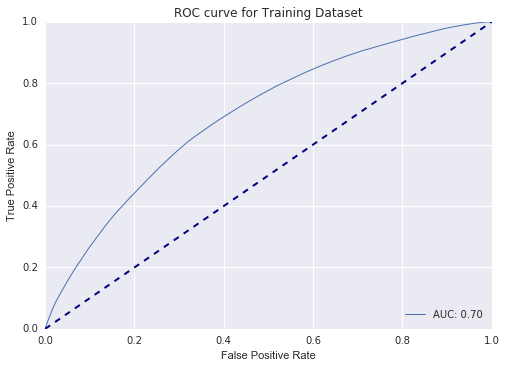

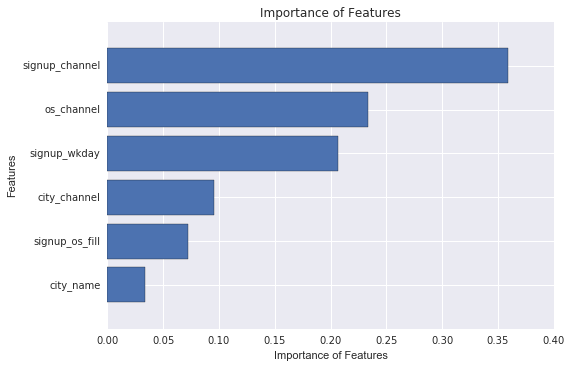

In [336]:
clf = RandomForestClassifier(n_estimators=50, class_weight = "balanced")

#1. Fit the model to our training data
clf = clf.fit(X_train, y_train)
ytrain_predprob = clf.predict_proba(X_train)[:,1] #predicted probablity 
ytrain_pred= clf.predict(X_train) #predicted outcome

#2. work on AUC and ROC 

fpr, tpr, thresholds = roc_curve(y_train, ytrain_predprob)

roc_auc = auc(fpr, tpr)
print 'Auc based on the probablity{0:.2f}'.format(roc_auc)
roc_auc1= roc_auc_score(y_train, ytrain_pred)
print'Auc based on the prediction{0:.2f}'.format(roc_auc1)

#plot the ROC Curve
plt.plot(fpr, tpr, lw=1,label='AUC: {0:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.title('ROC curve for Training Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#3. feature importance 
imp = clf.feature_importances_
names = X.columns
imp, names = zip(*sorted(zip(imp,names)))

plt.barh(range(len(names)), imp, align ='center')
plt.yticks(range(len(names)),names)
plt.xlabel ('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Features')
plt.show()


In [337]:
#try to search the best the cut-off point - With class_weight ='balanced', the probablity = 0.5 seems to yield the 
#best f1-score

#select the probablity cut-off based on the F1 score
from sklearn.cross_validation import cross_val_score

def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1] > cutoff).astype(int)
scores = []

# this function will return a function for crossvalidation 
def custom_f1(cutoff):
    def f1_cutoff(clf,X_train,y_train):
        ypred = cutoff_predict(clf, X_train, cutoff)
        return metrics.f1_score(y_train, ypred)
    return f1_cutoff

for cutoff in range(1,6):
    co = cutoff *0.1
    validated = cross_val_score(clf, X_train, y_train, cv = 10, scoring = custom_f1(co))
    validated2 = np.mean(validated)
    scores.append(validated2)

scores

[0.20275143363549528,
 0.20889222148350917,
 0.23181599467378455,
 0.25194874235973075,
 0.27324981199658482]

* Classifcation report and  confusion matrix 

In [338]:
ytrain_pred = clf.predict(X_train)
#print (metrics.f1_score(y_train, ypred, pos_label = 0))
print (classification_report(y_train, 
                             ytrain_pred, 
                             target_names=['Not Active', 'Active']))

confusion_matrix = metrics.confusion_matrix(y_train, ytrain_pred)
print ("Confusion Matrix ", confusion_matrix)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")


             precision    recall  f1-score   support

 Not Active       0.94      0.65      0.77     33988
     Active       0.19      0.64      0.29      4288

avg / total       0.85      0.65      0.71     38276

('Confusion Matrix ', array([[22095, 11893],
       [ 1536,  2752]]))
('Confusion Matrix ', array([[22095, 11893],
       [ 1536,  2752]]))
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 22095 | 11893 |
Actual   |-----|-----|
       1 | 1536 | 2752 |
         |-----|-----|


In [339]:
from sklearn.metrics import accuracy_score
predict_y = (clf.predict_proba(X_test)[:,1] > 0.5).astype(int)
print ("Accuracy = %.2f" % (accuracy_score(y_test, predict_y)))

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predict_y)
print ("Confusion Matrix ", confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, 
                            predict_y, 
                            target_names=['Not Active', 'Active']))


fpr, tpr, thresholds = roc_curve(y_test, predict_y)

roc_auc = auc(fpr, tpr)
print 'Auc based on the probablity{0:.2f}'.format(roc_auc)
roc_auc1= roc_auc_score(y_train, ytrain_pred)
print'Auc based on the prediction{0:.2f}'.format(roc_auc1)

#plot the ROC Curve
plt.plot(fpr, tpr, lw=1,label='AUC: {0:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.title('ROC curve for Test Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Accuracy = 0.65
('Confusion Matrix ', array([[9452, 5104],
       [ 670, 1178]]))
             precision    recall  f1-score   support

 Not Active       0.93      0.65      0.77     14556
     Active       0.19      0.64      0.29      1848

avg / total       0.85      0.65      0.71     16404



In [358]:
df.columns

Index([u'id', u'city_name', u'signup_os', u'signup_channel', u'signup_date',
       u'bgc_date', u'vehicle_added_date', u'vehicle_make', u'vehicle_model',
       u'vehicle_year', u'first_completed_date', u'signup_to_bgc',
       u'signup_to_add', u'signup_wkday', u'FirstTripDone', u'vehicleadd',
       u'bgcdone', u'signup_os_fill', u'consentbin', u'Daystobgc',
       u'city_channel', u'os_channel'],
      dtype='object')

In [359]:
y = df['FirstTripDone']

df['city_channel'] = [ df['city_name'].iloc[i] + df['signup_channel'].iloc[i] for i in range(len(df))]
df['os_channel'] = [df['signup_os_fill'].iloc[i] + df['signup_channel'].iloc[i] for i in range(len(df))]

selectvar = ['city_name','signup_channel', 'signup_os_fill','signup_wkday','city_channel', 'os_channel', 'Daystobgc']
X1 = pd.get_dummies(df[selectvar])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X1,y, random_state =5, test_size =0.3 )
print np.mean(y_train)
print np.mean(y_test)

X1.head()
    

0.112028425123
0.11265544989


,signup_wkday,Daystobgc,city_name_Berton,city_name_Strark,city_name_Wrouver,signup_channel_Organic,signup_channel_Paid,signup_channel_Referral,signup_os_fill_android web,signup_os_fill_ios web,...,os_channel_ios webReferral,os_channel_macOrganic,os_channel_macPaid,os_channel_macReferral,os_channel_otherOrganic,os_channel_otherPaid,os_channel_otherReferral,os_channel_windowsOrganic,os_channel_windowsPaid,os_channel_windowsReferral
0,5,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,8.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [362]:
#M = pd.concat([y, X1], axis = 1)
#M.to_csv("./cleaned_df.csv")

,FirstTripDone,signup_wkday,Daystobgc,city_name_Berton,city_name_Strark,city_name_Wrouver,signup_channel_Organic,signup_channel_Paid,signup_channel_Referral,signup_os_fill_android web,...,os_channel_ios webReferral,os_channel_macOrganic,os_channel_macPaid,os_channel_macReferral,os_channel_otherOrganic,os_channel_otherPaid,os_channel_otherReferral,os_channel_windowsOrganic,os_channel_windowsPaid,os_channel_windowsReferral
0,0,5,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,3,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,4,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,6,8.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


38276 38276


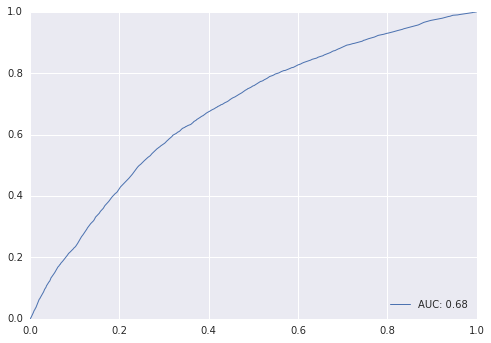

0.636977518075


In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score


logreg = LogisticRegression(class_weight = 'balanced')
logreg = logreg.fit(X_train, y_train)
#score = logreg.score(X_train, y_train)
ytrain_predprob = logreg.predict_proba(X_train)[:,1] 
ytrain_pred= logreg.predict(X_train)
print len(ytrain_pred), len(y_train)
#ytrain_pred
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predprob)
#fpr 
#trp 
#thresholds
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1,label='AUC: {0:.2f}'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()
print roc_auc_score(y_train, ytrain_pred)
    
#fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred , pos_label=2)
#roc_auc = auc(fpr, tpr)
#roc_auc
#"Mean accuracy of Logistic Regression: {0}".format(score)

In [351]:
logreg.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy = 0.64
('Confusion Matrix ', array([[9362, 5194],
       [ 653, 1195]]))
             precision    recall  f1-score   support

 Not Active       0.93      0.64      0.76     14556
     Active       0.19      0.65      0.29      1848

avg / total       0.85      0.64      0.71     16404



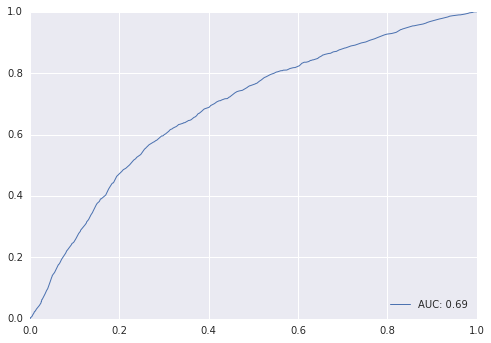

0.690335648768


In [347]:
from sklearn.metrics import accuracy_score
predict_y = (logreg.predict_proba(X_test)[:,1] > 0.5).astype(int)
print ("Accuracy = %.2f" % (accuracy_score(y_test, predict_y)))

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predict_y)
print ("Confusion Matrix ", confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, 
                            predict_y, 
                            target_names=['Not Active', 'Active']))
predict_y = logreg.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, predict_y)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1,label='AUC: {0:.2f}'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()
print roc_auc_score(y_test, predict_y)


In [348]:
from sklearn import svm

svm = svm.SVC(class_weight = 'balanced', kernel='linear') 
svm = svm.fit(X_train, y_train)


38276 38276


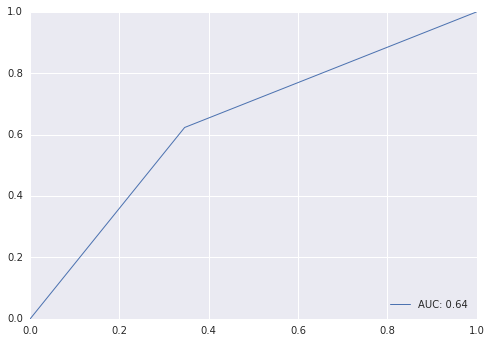

0.638725665797


In [349]:
#score = logreg.score(X_train, y_train)
#ytrain_predprob = logreg.predict_proba(X_train)[:,1] 
ytrain_pred= svm.predict(X_train)
print len(ytrain_pred), len(y_train)
#ytrain_pred
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1,label='AUC: {0:.2f}'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()
print roc_auc_score(y_train, ytrain_pred)
    
#fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred , pos_label=2)
#roc_auc = auc(fpr, tpr)
#roc_auc
#"Mean accuracy of Logistic Regression: {0}".format(score)


